# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;
---

## Important Dates

- Homework release: Fri 6 Nov 2020
- **Homework due**: Fri 20 Nov 2020, 23:59
- Grade release: Mon 30 Nov 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the data folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will **strictly** not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.
9. Lastly, the grading is done in the *double blind* mode, i.e., the TAs grades an anonymized version of your notebook, so make sure that your notebook **neither has your team name nor the names of the members**.

## Context

Publishing papers is a big part of the lives of [Ph.D. students](http://phdcomics.com/comics/archive.php?comicid=154), [post-docs](http://phdcomics.com/comics/archive.php?comicid=1744) and [professors](http://phdcomics.com/comics/archive.php?comicid=1051). 
In Computer Science, publishing happens mostly in conferences. What follows is a slight simplification of how these conferences decide which papers to accept and which papers to reject.
 
Every year, scholars submit papers to prestigious conferences. The papers are then assigned to reviewers (usually around 3), who are other people from the same research community (respect thy neighbor!). Each reviewer weighs in on whether they believe the papers they were assigned are good or bad, and write a review, often along with a score (e.g. +3 Strong Accept, +2 Accept, +1 Weak Accept, 0 Borderline, …,  -3 Strong Reject). Then, in the end, "special" reviewers called, "Area Chairs" analyze all the reviews that were written for the same paper and decide what gets accepted and what gets rejected. Importantly, throughout this whole dance, reviewers and authors are anonymous. When you're reviewing a paper, you do not know who wrote it. And when you receive the review, you don't know who reviewed it. Because of that, we call this a double-blind reviewing process.

An interesting development that has evolved in recent years is the rise of pre-prints. In previous times, researchers often exposed their research to the world only after it had been peer-reviewed and published in a conference or a journal. But recently researchers are much keener to let their ideas out into the world as soon as possible, and they publish their research before it has been approved to any conference or journal, by posting the research on so-called pre-print servers. The most common pre-print server for Computer Science, Physics, and Maths is called [arXiv](https://arxiv.org/), for Biology, an increasingly popular one is [bioRxiv](https://www.biorxiv.org/), for Psychology [psyArXiv](https://psyarxiv.com/) (they are not very creative with the names). Notice that pre-prints and peer-review are not mutually exclusive, in fact, usually, you publish your pre-print, and then you try to publish your work in a peer-reviewed setting.

Overall, publishing pre-prints has many benefits. They make science more accessible and hasten the circulation of important results in the academic community. However, a big issue brought forth with pre-prints is that they often break the anonymity in the double-blind reviewing process. For instance, in machine learning, since most papers are published as pre-prints, it is often easy to figure out if the paper you are reviewing is from a famous researcher or a big company with prominent research scientists. From critics' viewpoint, knowing the authors of the papers you are reviewing can bias your reviews. If you know that a given author is famous, you'd be more inclined to take his or her word for granted. If the author is from an institution you’ve never heard about, you are more likely to doubt his or her findings.

In this homework, we will take a data-driven deep dive into the world of academic publishing. Can you use your freshly acquired data-science skills to predict which papers are going to make the cut? Are your data analysis skills sharp enough to figure out whether the aforementioned concerns about pre-print issues are justified?


## The data

The data, whose source has been *"double-blinded"* from you, and which has been simplified a bit for the assignment, contains information about submissions to a prestigious machine learning conference called ICLR (pronounced “I-clear”). You can find the dataframe in the git repo for the homework (`./data/dataset_final.csv`). We provide a brief description of the fields you will encounter.

- `year`: year the paper has been submitted to ICLR. Notice that we provide data for three years, 2018, 2019, and 2020.


- `paper`: title of the paper.


- `authors`: names of the authors separated by ;.


- `ratings`: mean rating given to the paper by the reviewers.


- `decisions`: either Accept if the paper was accepted, or Reject otherwise.


- `institution`: institutions for each of the authors, separated by ;.


- `csranking`: ranking of the institutions according to csrankings. The better the institution, the better the rank. Notice that, if a paper has more than 1 author, this field will contain multiple values, separated by ;. For institutions that are not in csrankings, the value will be -1.


- `categories`: topical categories of the paper. Each number corresponds to a different category: (1) Theory, (2) Computer Vision, (3) Natural Language Processing, (4) Adversarial ML, (5) Generative Modeling, (7) Fairness, (8) Generalization, (9) Optimization, (10) Graphs, (11) Bayesian Methods, (0) Others. A paper may belong to multiple categories, separated by ;.


- `authors_citations`: number of citations of each one of the authors, separated by ;.


- `authors_publications`: number of publications by each one of the authors, separated by ;.


- `authors_hindex`: h-index of each one of the authors, separated by ;. The h-index is an author-level metric that measures both the productivity and citation impact of the publications of a scientist or scholar. It is the maximum value $h$ such that the given author has published $h$ papers that have each been cited at least $h$ times.


- `arxiv`: whether the paper was spotted in a pre-print server around the submission period.

Also, notice that in this dataframe, when some piece of data was not available, -1 will be used as the value. For example, companies aren't a part of csrankings, so for people who work in big companies, the values are -1 in the field csranking.


## _Step 1:_ Predicting paper ratings

The first part of this homework poses a simple question: Can you predict the ratings the paper will receive given attributes related to its authors? To answer this question, we will build an ML pipeline from scratch, preprocessing the data, training a regression model, and then evaluating it.


---

### Task 1.1

Some of the fields in the data are not very amenable to serve as input to traditional machine learning algorithms. Namely, we have some fields for which there are a varying number of values (e.g. papers with 3 authors will have 3 values in the `author_citations` field, papers with 5 authors will have 5).


Your first task is to perform some feature engineering and derive unique values for each paper which you will be able to use in your ML model. 
More specifically, you must:

1. Create 3 new fields in the dataframe corresponding to the median value of the number of citations per author, the number of publications per author, and the h-index per author. So for instance, for the row `authors_publications`, you will create an additional column, e.g. `authors_publications_median`, containing the median number of publications per author in each paper.
2. Create another field entitled `reputation` capturing how famous the last author of the paper is. Notice that the last author of the paper is usually the most senior person involved in the project. This field should equal $\log_{10}\Big(\frac{\#citations}{\#publications} + 1\Big)$. Notice that each author in the dataset has at least 1 publication, so you don't risk dividing by 0.
3. Create two fields called `has_top_company` and `has_top_institution`. The field `has_top_company` equals 1 if the article contains an author in the following list of companies `["Facebook", "Google", "Microsoft", "Deepmind"]`, and 0 otherwise. The field `has_top_institution` equals 1 if the article contains an author in the top 10 institutions according to CSRankings.
4. **Discuss:** How did you handle -1 values in item 1.1.1? Justify your approach.

---

First, Let's inspect the data

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('data/dataset_final.csv')
df.head(1)

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv
0,2018,Certifying Some Distributional Robustness with...,Aman Sinha;Hongseok Namkoong;John Duchi,9.0,Accept,Stanford University;Stanford University;Stanfo...,4;4;4,4,655;904;12908,42;19;162,8;10;42,True


Some columns contain lists of numbers in string representation  
It is quite handy to turn them to arrays of ints to make further use more conveinient
The same split will be done for strings separated with ';' like institutions and authors

In [2]:
#Authors and institutions
for col_name in ['authors', 'institution']:
    df[col_name]=[np.array(x.split(';')) for x in df[col_name]]

# Rankings, citations, publications, hindex
for col_name in df.columns[-6:-1]:
    df[col_name]=[np.array(x.split(';')).astype(int) for x in df[col_name]]

df.head(1)

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv
0,2018,Certifying Some Distributional Robustness with...,"[Aman Sinha, Hongseok Namkoong, John Duchi]",9.0,Accept,"[Stanford University, Stanford University, Sta...","[4, 4, 4]",[4],"[655, 904, 12908]","[42, 19, 162]","[8, 10, 42]",True


Proceed to making additional median columns

In [3]:
#Three columns that we want to get median of
Cols_to_Median=df.columns[-4:-1]

for col_name in Cols_to_Median:
    df[col_name+'_median']=[np.median(x) for x in df[col_name].values]

Now create a reputation column

In [4]:
#Here first index 0/1 refers to either citations or publications and the second one [-1] - to the last author
df['reputation']=[np.log10(x[0][-1]/x[1][-1]+1) for x in df[['authors_citations','authors_publications']].values]

Finally to the companies and institutions

In [5]:
top_companies=["Facebook", "Google", "Microsoft", "Deepmind"]

#I use int(Bool) to turn True/False into 1/0 as you wished 
df['has_top_company']=[int(np.isin(x,top_companies).any()) for x in df['institution']]

#We need to check the rank should not be -1 (The insitution should be recognized)
df['has_top_institution']=[int(((x<=10) & (x!=-1)).any()) for x in df['csranking']]

Let's take a look at what we've got

In [6]:
df.head().iloc[:,-6:]

,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution
0,904.0,42.0,10.0,1.906761,0,1
1,889.5,87.0,15.5,0.966675,0,0
2,8800.0,78.0,33.0,1.714100,1,1
3,1382.0,63.0,20.0,1.258896,0,0
4,658.0,40.0,9.0,0.984882,0,0


Discussion:  
It is likely that all top institutions are present in the rating. Therefore, everything that is not present there is can't be top institution

### Task 1.2

Now that you have cleaned up your data, your next task is to divide your data into a training set and a testing set. You should do this in two ways:

1. First, do it randomly. Split the data into a training set (70%) and a testing set (30%). We refer to these as "random split" in the subsequent tasks.
2. Second, do it longitudinally. Use the data from 2018 and 2019 for the training set, and the data from 2020 as the testing set. We refer to these as "longitudinal split" in the subsequent tasks.


Random split

In [7]:
from sklearn.model_selection import train_test_split

train_rand, test_rand = train_test_split(df, test_size=0.3)

Longitudinall split

In [8]:
train_year=df[np.isin(df.year,[2018,2019])]
test_year=df[df.year==2020]

### Task 1.3

Build a Linear Regression model (use [sklearn](https://scikit-learn.org/stable/)) that predicts the score of a paper (which is in the variable ratings in the dataframe). Train it and test it using the split you previously defined. Your model should use as features:
- Median values for the number of author citations, publications and h-indexes, as calculated in Task 1.1.1.

- `reputation` of the last author, as calculated in Task 1.1.2.

For the two scenarios above (random split and longitudinal split):

1. Report the model $R^2$ in each case (for the testing set).
2. **Discuss:** Hypothesize a reason why the results are different. Additionally, interpret the $R^2$ value for the longitudinal split. How can it be negative?
3. **From now onwards (in this task and the following ones), consider only the random split.** For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Plot the distribution of your residuals for the test set. Using this distribution, estimate what is the probability that your prediction is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.
4. **Discuss:** Identify three additional features that are already computed in your dataframe and that could boost your model's predictive performance. You are not allowed to use the variable `decisions` as an input here. Before running any experiments, discuss why each of these features might add valuable information to your model.
5. Report the $R^2$ (for the test set) for a newly trained model with these additional features. Please note that you do not need to improve the model performance to be successful in this task!

**Hint**: [Metrics!](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)

In [9]:
### Your code here! ###

In [10]:
from sklearn.linear_model import LinearRegression

features=df.columns[-6:-2]

Random split

In [11]:
lin_reg_rand=LinearRegression()
lin_reg_rand.fit(train_rand[features],train_rand['ratings'])

print('Random split R^2 score is {:.4f}'.format(lin_reg_rand.score(test_rand[features],test_rand['ratings'])))

Random split R^2 score is 0.0892


Year split

In [12]:
lin_reg_year=LinearRegression()
lin_reg_year.fit(train_year[features],train_year['ratings'])

print('Year split R^2 score is {:.4f}'.format(lin_reg_year.score(test_year[features],test_year['ratings'])))

Year split R^2 score is -0.2388


R^2 is (1-u/v) where u is residual sum of squares ((y_true - y_pred) ** 2).sum() and v is total sum of squares ((y_true - y_true.mean()) ** 2).sum().  

In our case u>v.

In general it means that using regression line is worse than just using the mean value

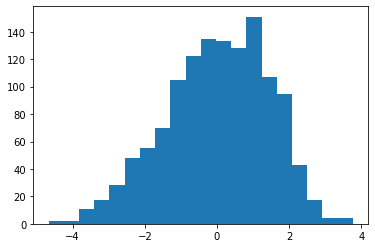

In [13]:
import matplotlib.pyplot as plt

Residuals=test_rand['ratings']-lin_reg_rand.predict(test_rand[features])
plt.hist(Residuals,bins=20)
plt.show()

In [14]:
from statsmodels.stats import diagnostic

In [15]:
Probability_off_2=len(np.where(np.abs(Residuals)>2))/len(Residuals)
print('Probability to deviate by more than 2 is {:.4f} %'.format(Probability_off_2*100))

Probability to deviate by more than 2 is 0.0783 %


In [16]:
def bootstrap_Prob(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices]
        means[n] = len(np.where(np.abs(data_tmp)>2))/len(data_tmp)
    
    #return means
    return [np.nanpercentile(Probability_off_2, 2.5),np.nanpercentile(Probability_off_2, 97.5)]

Didn't get how to make conf intervals

In [17]:
bootstrap_Prob(Residuals,1000)

[0.0007830853563038371, 0.0007830853563038371]

The logical desision is to include three more features:
has_top_company,has_top_institution, arxiv

In [18]:
df.head(10)

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution
0,2018,Certifying Some Distributional Robustness with...,"[Aman Sinha, Hongseok Namkoong, John Duchi]",9.000000,Accept,"[Stanford University, Stanford University, Sta...","[4, 4, 4]",[4],"[655, 904, 12908]","[42, 19, 162]","[8, 10, 42]",True,904.0,42.0,10.0,1.906761,0,1
1,2018,Parametric Information Bottleneck to Optimize ...,"[Thanh T. Nguyen, Jaesik Choi]",4.666667,Reject,[Ulsan National Institute of Science and Techn...,"[468, 468]",[8],"[1052, 727]","[86, 88]","[16, 15]",False,889.5,87.0,15.5,0.966675,0,0
2,2018,Towards Neural Phrase-based Machine Translation,"[Po-Sen Huang, Chong Wang, Sitao Huang, Dengyo...",6.666667,Accept,"[Microsoft, Google, University of Illinois, Ur...","[-1, -1, 3, -1, -1]","[3, 2]","[1718, 17889, 161, 8800, 20766]","[59, 1045, 17, 78, 409]","[17, 54, 7, 33, 63]",True,8800.0,78.0,33.0,1.714100,1,1
3,2018,Interactive Grounded Language Acquisition and ...,"[Haonan Yu, Haichao Zhang, Wei Xu]",6.333333,Accept,"[Baidu, Baidu, Baidu]","[-1, -1, -1]","[6, 8]","[890, 1382, 9553]","[37, 63, 557]","[12, 20, 44]",False,1382.0,63.0,20.0,1.258896,0,0
4,2018,A Boo(n) for Evaluating Architecture Performance,"[Ondrej Bajgar, Rudolf Kadlec, and Jan Kleindi...",4.666667,Reject,"[, International Business Machines, Internatio...","[-1, -1, -1]",[0],"[366, 678, 658]","[10, 40, 76]","[5, 11, 9]",False,658.0,40.0,9.0,0.984882,0,0
5,2018,Countering Adversarial Images using Input Tran...,"[Chuan Guo, Mayank Rana, Moustapha Cisse, Laur...",6.333333,Accept,"[Cornell University, Facebook, Facebook, Faceb...","[7, -1, -1, -1]",[4],"[1313, 392, 2917, 17805]","[23, 5, 48, 93]","[8, 2, 19, 32]",True,2115.0,35.5,13.5,2.284322,1,1
6,2018,A Neural Representation of Sketch Drawings,"[David Ha, Douglas Eck]",7.000000,Accept,"[Google, Google]","[-1, -1]",[5],"[1238, 2532]","[66, 84]","[11, 26]",True,1885.0,75.0,18.5,1.493358,1,0
7,2018,The Kanerva Machine: A Generative Distributed ...,"[Yan Wu, Greg Wayne, Alex Graves, Timothy Lill...",6.666667,Accept,"[Google, Google, Google, Google]","[-1, -1, -1, -1]","[5, 11]","[2383, 2530, 43616, 23365]","[207, 32, 87, 74]","[22, 15, 50, 39]",False,12947.5,80.5,30.5,2.500707,1,0
8,2018,Minimax Curriculum Learning: Machine Teaching ...,"[Tianyi Zhou, Jeff Bilmes]",5.666667,Accept,"[University of Washington, University of Washi...","[6, 6]",[0],"[1444, 13443]","[80, 348]","[14, 53]",False,7443.5,214.0,33.5,1.598017,0,1
9,2018,Multi-View Data Generation Without View Superv...,"[Mickael Chen, Ludovic Denoyer, Thierry Artières]",6.333333,Accept,"[LIP6, LIP6, Aix Marseille University]","[-1, -1, 468]","[5, 4]","[43, 2995, 1302]","[4, 128, 144]","[3, 22, 16]",True,1302.0,128.0,16.0,1.001806,0,0


In [19]:
def Get_Lin_reg(features):
    lin_reg_rand=LinearRegression()
    lin_reg_rand.fit(train_rand[features],train_rand['ratings'])
    
    print('R^2 score is {:.4f} in comparison to initial 0.0799'.format(lin_reg_rand.score(test_rand[features],test_rand['ratings'])))
    return lin_reg_rand

As it was mentioned in the begining. Referees can recognize article because they could see it in arxiv before giving the score. Therefore, they can get biased.

In [20]:
features_exp=np.append(features,['arxiv'])

_=Get_Lin_reg(features_exp)

R^2 score is 0.1027 in comparison to initial 0.0799


It is sensible that in average top_companies publish better articles

In [21]:
features_exp=np.append(features,['has_top_company'])

_=Get_Lin_reg(features_exp)

R^2 score is 0.0871 in comparison to initial 0.0799


Same is likely for institutions, however it is not the case here

In [22]:
features_exp=np.append(features,['has_top_institution'])

_=Get_Lin_reg(features_exp)

R^2 score is 0.0857 in comparison to initial 0.0799


Overall improvement

In [23]:
features_exp=np.append(features,['arxiv','has_top_institution','has_top_institution'])

_=Get_Lin_reg(features_exp)

R^2 score is 0.0990 in comparison to initial 0.0799


Leaving only arxiv give best results

### Task 1.4

Experiment with training a different regressor, a [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/ensemble.html?highlight=xgboost#gradient-boosting). This regressor is analogous to the Gradient Boosting Classifier that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on [Kaggle](www.kaggle.com)). You must:

1. Train a Gradient Boosting Regressor without specifying any parameters, e.g. `GradientBoostingRegressor().fit(X, y)`, and report its $R^2$ on the testing set. Your model should again use as features:
    - Median values for the number of author citations, publications and h-indexes as calculated in Task 1.1.1.
    - `reputation` of the last author, as calculated in Task 1.1.2.
2. Create an additional feature called $crazy$, which is derived as follows. If the score  of the paper, $ratings$, is bigger than 4.96, then $crazy = 9 - ratings$, otherwise, $crazy = - ratings$. Train a Gradient Boosting Regressor to predict paper scores using only $crazy$ as a feature. Additionally, train a Linear Regression model to predict paper scores using only $crazy$ as a feature. Report the $R^2$ in the testing set.
3. **Discuss:** Why does the Gradient Boosting Regressor perform so much better?

In [24]:
from  sklearn.ensemble import GradientBoostingRegressor
gr_boost=GradientBoostingRegressor()
gr_boost.fit(train_rand[features],train_rand['ratings'])

print('Gradient boosting R^2 score is {:.4f}'.format(gr_boost.score(test_rand[features],test_rand['ratings'])))

Gradient boosting R^2 score is 0.0822


In [25]:
df['crazy']=[9-x if x>4.96 else -x for x in df['ratings']]
train_rand, test_rand = train_test_split(df, test_size=0.3)


gr_boost.fit(train_rand['crazy'].to_numpy().reshape(-1,1),train_rand['ratings'])
lin_reg_rand.fit(train_rand['crazy'].to_numpy().reshape(-1,1),train_rand['ratings'])

print('Gradient boosting R^2 score is {:.4f}'.format(gr_boost.score(test_rand['crazy'].
                                                                    to_numpy().reshape(-1,1),test_rand['ratings'])))
print('Linear regression R^2 score is {:.4f}'.format(lin_reg_rand.score(test_rand['crazy'].
                                                                        to_numpy().reshape(-1,1),test_rand['ratings'])))

Gradient boosting R^2 score is 1.0000
Linear regression R^2 score is 0.4278


The results are so good probably because X and Y are quasilinearly correlated which makes it easy to build a model

### Task 1.5

Complex models often have several hyper-parameters. 
To obtain the best results, it is common-place to use a cross-validation set-up in your training data to find the best hyper-parameters, and then use it for the test set.


1. Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation.
2.  Experiment tuning two hyper-parameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`.
For each possible combination of the two hyper-parameters (see below for the range of values that you should try for each hyper-parameter), train your model in a cross-validation setup with $N$=20. Report the mean $R^2$ along with the 90% CI for the 18 scenarios. Notice that you can calculate the 90% CI in a bootstrap-like fashion.
    - `n_estimators`$ \in  \{ 50, 75, 100, 150, 200, 250\}$
    - `learning_rate`$ \in  \{ 0.1, 0.05, 0.01\}$.
3. With the best hyper-parameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
4. **Discuss:** Why don't we tune the hyper-parameters in the testing set instead of doing cross-validation in the training set?

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

X=train_rand[features]
Y=train_rand['ratings']

def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 5),np.nanpercentile(means, 95)]

def Cross_Val(model,N):
    Score=cross_val_score(model, X, Y, cv=N)
    return Score.mean(), bootstrap_CI(Score,1000)

In [27]:
for n_estimators in [50,75,100,150,200,250]:
    for learning_rate in [0.1,0.05,0.01]:
        gr_boost=GradientBoostingRegressor(n_estimators=n_estimators,learning_rate=learning_rate)
        score_mean,CL=Cross_Val(gr_boost,20)
        print('N={} LR={} R^2={:.3f} +/- {:.3f}'.format(n_estimators,learning_rate,score_mean,(CL[1]-CL[0])/2))

N=50 LR=0.1 R^2=0.097 +/- 0.022
N=50 LR=0.05 R^2=0.098 +/- 0.019
N=50 LR=0.01 R^2=0.058 +/- 0.009
N=75 LR=0.1 R^2=0.092 +/- 0.022
N=75 LR=0.05 R^2=0.099 +/- 0.021
N=75 LR=0.01 R^2=0.074 +/- 0.012
N=100 LR=0.1 R^2=0.089 +/- 0.023
N=100 LR=0.05 R^2=0.097 +/- 0.021
N=100 LR=0.01 R^2=0.083 +/- 0.014
N=150 LR=0.1 R^2=0.077 +/- 0.024
N=150 LR=0.05 R^2=0.094 +/- 0.023
N=150 LR=0.01 R^2=0.093 +/- 0.017
N=200 LR=0.1 R^2=0.063 +/- 0.025
N=200 LR=0.05 R^2=0.090 +/- 0.022
N=200 LR=0.01 R^2=0.097 +/- 0.018
N=250 LR=0.1 R^2=0.050 +/- 0.025
N=250 LR=0.05 R^2=0.084 +/- 0.024
N=250 LR=0.01 R^2=0.099 +/- 0.018


Combination N=50 LR=0.1 appears to be the best one

In [28]:
gr_boost=GradientBoostingRegressor(n_estimators=75, learning_rate=0.05)
gr_boost.fit(X,Y)

print('Gradient boosting R^2 score is {:.4f}'.format(gr_boost.score(test_rand[features],test_rand['ratings'])))

Gradient boosting R^2 score is 0.1031


Discussion: We don't tune our parameters on training set to remain the experiment clear.  
If we do, we will implicitly fit the model to our training set, therefore bias our predictions

## _Step 2:_ What influences papers getting accepted?

Time to change hats!

If before we were interested in creating an accurate regressor, now we are interested in understanding what increases the chance of papers getting accepted. 

Typically, in that scenario, simpler models with a clear statistical interpretation (e.g. logistic regression) yield more interesting insights.

For the analysis in this and the next step, you should use [statsmodels](https://www.statsmodels.org/) (for the regressions) and [scipy](https://www.scipy.org/) (for the statistical hypothesis testing).


### Task 2.1

Let's warm up with some visualizations and some hypothesis testing!

1. Plot the distributions of 1) ratings of papers that got accepted in 2020, 2) ratings of papers that got rejected in 2020.
2. Select a statistical test to compare whether the mean for ratings of papers that got accepted in 2020 is significantly higher.
3. **Discuss:** Justify why the statistical test you selected is appropriate. Interpret the test-related statistic and its p-value: concretely, what do they mean?

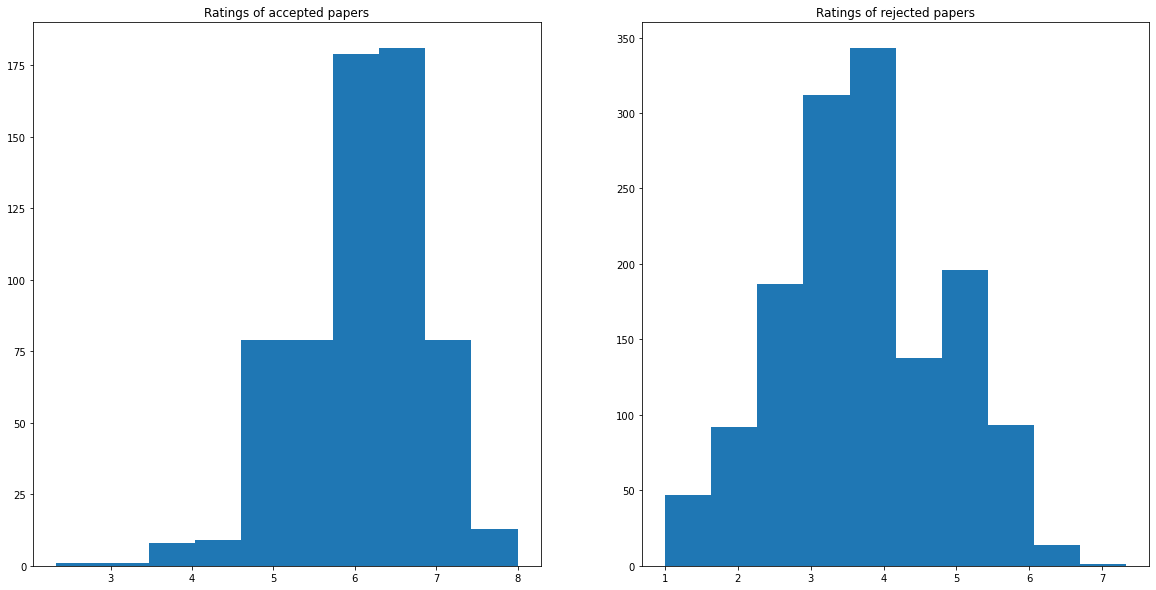

In [29]:
plt.figure(figsize=(20,10))

Accepted_ratings=test_year[test_year.decisions=='Accept']['ratings']
Rejected_ratings=test_year[test_year.decisions=='Reject']['ratings']

plt.subplot(121)
plt.hist(Accepted_ratings)
plt.title('Ratings of accepted papers')

plt.subplot(122)
plt.hist(Rejected_ratings)
plt.title('Ratings of rejected papers')

plt.show()

In [30]:
from scipy.stats import ttest_ind
ttest_ind(Accepted_ratings,Rejected_ratings)

Ttest_indResult(statistic=45.79777665813106, pvalue=5.21595695e-316)

Two sampled T-test :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different

statistics is t-statistics  ?  
p_value means that mean rating of accepted papers is significantly higher, then the rejected ones

### Task 2.2

We will now carry out a logistic regression modeling the binary variable `decisions` as a function of the continuous variable `ratings` and an intercept. 

Recall that a logistic regression is a model in the form:

$$
\log \Big( \frac{p}{1-p} \Big) = b_0 + b_1x_1 + b_2x_2 + \ldots
$$

Where $p$ is the probability of the dependent variable (here, `decisions`) being equals to 1. 
Note that $\frac{p}{1-p}$ represents the odds of the variable, and thus, on the left-hand side we have the log-odds of the variable.
This can be also written as:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0 + b_1 x_1 + b_2 x_2 + \ldots} =  e^{b_0} e^{b_1 x_1} e^{b_2 x_2} \ldots
$$

Given a linear variable, say $x_1$, if we increase the value associated with this variable by a single unit, and keep everything constant, we have:

$$
 e^{b_1(x_1+1)} =  e^{b_1 x_1 + b_1} = e^{b_1 x_1}e^{b_1}  
$$

This means that we multiply the odds of the outcome variable by $e^{b_1}$. Thus, let's say that $x_1$ is the average rating, and $\beta_1$ is the associated coefficient. Also, let's assume that $\beta_1$ equals 2. In that case, increasing the score of the paper by 1 unit is equivalent to multiplying both sides of the previous equation by $e^{b_1}$. The original equation for our model becomes:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0} e^{b_1 x_1} 
$$
$$
\Big( \frac{p}{1-p} \Big) e^{b_1}  = e^{b_0} e^{b_1 x_1} e^{b_1}
$$

Since $b_1=2$, we have that this is the same as multiplying the odds of the variable by $e^2\approx7$. 
So for example, if a paper with a score 5 had $p=0.05$ of being approved, its odds would be $0.05/0.95\approx0.052$. According to our model, an increase in 1-rating point would mean that the new odds would be $0.052*7\approx0.36$. Using the odds formula  ($\frac{p}{1-p}$), this suggests that this paper would have a chance of $0.56$ of being accepted.

---

This is the theory. Now, let's find out what the real world looks like.


1. Fit a logistic regression model to our data considering as the training set all papers submitted in 2020. Your model should predict a binary variable related to decisions (which equals true if the paper was accepted and false otherwise) as a function of the paper ratings and an intercept. In mathematical notation:
$$
d = b_0 + r b_1
$$
Where $d$ is the binary variable corresponding to a decision, $r$ is a numeric variable corresponding to the rating a paper has received and $b$ are coefficients.
Notice that here we have no testing set!
Report the summary of your model. 
2. **Discuss:** Interpreting the coefficients of your model, calculate the probability that a paper with a score 7 will be accepted.


In [31]:
test_year.head(1)

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution
2204,2020,Pitfalls of In-Domain Uncertainty Estimation a...,"[Arsenii Ashukha, Alexander Lyzhov, Dmitry Mol...",6.666667,Accept,"[Samsung, Skolkovo Institute of Science and Te...","[-1, -1, -1, 481]",[0],"[488, 12, 481, 2097]","[14, 2, 17, 124]","[8, 1, 7, 16]",False,484.5,15.5,7.5,1.253127,0,0


In [32]:
import statsmodels.api as sm

X=test_year['ratings'].values
Y=[True if x=='Accept' else False for x in test_year['decisions'].values]

X=sm.add_constant(X)
log_reg = sm.Logit(Y, X).fit() 

Optimization terminated successfully.
         Current function value: 0.251882
         Iterations 8


In [33]:
b0,b1=log_reg.params
print('b0={} b1={}'.format(b0,b1))

b0=-12.881149050197514 b1=2.367234070658943


In [34]:
log_reg.predict([1,7])

array([0.97562427])

In [35]:
p_ratio=np.exp(log_reg.predict([1,7]))
probability=np.asscalar(p_ratio/(1+p_ratio))
print('Probability for rating 7 to be intercept is {:.2f} %'.format(probability*100))

Probability for rating 7 to be intercept is 72.62 %


/home/sdd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


### Task 2.3

Our model is not so interesting since the only independent variable (that is, our model' feature or predictor) is something blatantly associated with paper acceptance. Let's go further! 

1. Run a logistic regression with the binary decision as the dependent variable (the outcome) and using as independent variables (the features): ratings, the reputation of the last author, and whether the paper was on arxiv or not. That is, in [patsy-style formula](https://patsy.readthedocs.io/en/latest/formulas.html): `decisions ~ ratings + reputation + arxiv` (variable names do not need to be exactly these). Consider all papers submitted in 2020 as your training data.
Notice that reputation was calculated in Task 1.1. 
2. **Discuss:** Unlike `ratings` and `reputation`, the variable `arxiv` is binary. Following the same logic as we did for continuous variables in the text of Task 2.2, interpret the meaning of this coefficient. What happens to the odds ratio if the paper was seen in arxiv? Is this effect statistically significant?

In [36]:
test_year.head(1)

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution
2204,2020,Pitfalls of In-Domain Uncertainty Estimation a...,"[Arsenii Ashukha, Alexander Lyzhov, Dmitry Mol...",6.666667,Accept,"[Samsung, Skolkovo Institute of Science and Te...","[-1, -1, -1, 481]",[0],"[488, 12, 481, 2097]","[14, 2, 17, 124]","[8, 1, 7, 16]",False,484.5,15.5,7.5,1.253127,0,0


In [42]:
from statsmodels.formula.api import ols

test_year['decisions_bool']=[1 if x=='Accept' else 0 for x in test_year['decisions']]
test_year['arxiv_bool']=test_year.arxiv.astype(int)

model=ols(formula='decisions_bool ~ ratings + reputation + arxiv_bool', data=test_year).fit()
model.params

/home/sdd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sdd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Intercept    -0.614729
ratings       0.204589
reputation    0.004745
arxiv_bool    0.026102
dtype: float64

Coeff for Arxiv works as a bias for whether paper was seen on Arxiv or was not. Apparently papers seen on arxiv are less likely to be accepted

### Task 2.4

Let's finally move on to the question that you have been dying to answer: Do pre-prints favor top institutions? 

In order to (try to) answer that question, you must fit yet another logistic regression.

Your regression should have the paper decision as the dependent variable, and `ratings`, `reputation`, and `arxiv` as independent variables just like in task 2.3. Yet, here, include also as independent variables the binary variable `has_top_institution`, which equals 1 if the paper has an author in a top-10 institution; and the interaction variable `arxiv:has_top_institution`, which equals one only if the paper is from a top-10 institution **and** if it appeared on arxiv before the submission deadline. In patsy-style formula your model should look something like: 

`decisions_bool ~ ratings + reputation + arxiv + has_top_institution + arxiv:has_top_institution`


1. Fit this model and estimate the effect of posting on arxiv for a top institution. Again, consider only papers submitted in the 2020 edition.
2. **Discuss:** Interpreting the p-values, discuss: is this evidence that arxiv breaks double-blind submissions?

In [43]:
model=ols(formula='decisions_bool ~ ratings + reputation + arxiv + has_top_institution + arxiv:has_top_institution', data=test_year).fit()
model.params

Intercept                           -0.611385
arxiv[T.True]                        0.004606
ratings                              0.204145
reputation                           0.000949
has_top_institution                  0.013556
arxiv[T.True]:has_top_institution    0.080684
dtype: float64

How to get p_values?

## Step 3: Matching

Okay, so let's change hats one last time.

As you have all seen in class, a particularly powerful way of disentangling causal effects from observational data is through matching: making sure we are not comparing apples to oranges.


### Task 3.1

One of the ways to do matching is called "Propensity Score Matching." There, we calculate a *propensity score* for each subject which represents the propensity to receive a "treatment." Then, we match subjects who received and did not receive the treatment, but that had similar propensity scores (that is, even though some received the treatment and some did not, they had similar chances to receive it).

In our specific case, we can further attempt to study the impact of pre-prints by considering publishing to arxiv as our "treatment".

In that context, the first step to perform propensity score matching is to create a classifier that predicts whether a paper was published on arxiv or not.

1. We have trained this classifier for you (don't get spoiled!). You may load the pandas dataframe entitled `propensity_scores.csv.gz` from the github repo. 
Notice that we will be using only the articles published in 2020. 
Create a new dataframe that is a merged version of this new dataframe with the dataframe you have been working on so far. Remember to keep only the papers published in 2020!
2. **Discuss:** In which way is this classifier (that is a classifier trained to estimate propensity scores) different from the regressor that you trained in Step 1?

**Hint:** For this classifier we don't need a training set and a testing set!


In [44]:
propensity=pd.read_csv('data/propensity_scores.csv.gz')
propensity.head()

,paper,propensity_score
0,Pitfalls of In-Domain Uncertainty Estimation a...,0.360486
1,An Inductive Bias for Distances: Neural Nets t...,0.567842
2,Stochastic AUC Maximization with Deep Neural N...,0.334322
3,On the interaction between supervision and sel...,0.402644
4,Towards Better Understanding of Adaptive Gradi...,0.334322


In [45]:
df_2020=propensity.merge(df[df.year==2020],on='paper')
df_2020.head(1)

,paper,propensity_score,year,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution,crazy
0,Pitfalls of In-Domain Uncertainty Estimation a...,0.360486,2020,"[Arsenii Ashukha, Alexander Lyzhov, Dmitry Mol...",6.666667,Accept,"[Samsung, Skolkovo Institute of Science and Te...","[-1, -1, -1, 481]",[0],"[488, 12, 481, 2097]","[14, 2, 17, 124]","[8, 1, 7, 16]",False,484.5,15.5,7.5,1.253127,0,0,2.333333


The values are restricted to 0,1

### Task 3.2

Now is time to match users! You will be implementing a technique called *caliper matching*. 

Create pairs of users as follows. For each treated subject (here a paper that was submitted to arxiv), find a non-treated subject (a paper that was not submitted to arxiv) with similar propensity score. Namely, if the propensity score of the treated unit is $p_t$, you must find a non-treated unit $p_c$ with propensity score $|p_{c} - p_t| < \epsilon$. If there is no such a non-treated unit, you may ignore the treated unit and move forward with the matching. Notice that your output must be a 1-to-1 matching. So each paper can only be matched once.

1. Perform this matching procedure using $\epsilon = 0.05$.
2. Report how many pairs did you manage to match? How many didn't you?

Some code to do kNN matching with duplicates exclusion

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

def construct_mathed_dfs(df):
    #Split df on treated and non_treated
    treated_df=(df[df.arxiv==True])
    non_treated_df=(df[df.arxiv==False])

    #Get treated and non treated prop scores
    treated_x = treated_df['propensity_score'].to_numpy().reshape(-1,1)
    non_treated_x = non_treated_df['propensity_score'].to_numpy().reshape(-1,1)

    #Fit kNN with 1 neighbor and limited distance on non_treated
    scaler = StandardScaler()
    nbrs = NearestNeighbors(n_neighbors=1, radius=0.05).fit(non_treated_x)

    #Get nearest neighbors for treated, but with intersections
    distances, indices = nbrs.kneighbors(treated_x,n_neighbors=1)
    indices = indices.reshape(indices.shape[0])
    matched = non_treated_df.iloc[indices]

    #Preserve the order numbers as they refer to inices of treated_x
    matched['treated_index']=[x for x in range(len(matched))]

    #Drop all duplicates and obtain two dataframes with unique caliper matching based on row index
    non_treated_matched=matched.drop_duplicates('paper')
    treated_matched=treated_df.iloc[non_treated_matched.treated_index].reset_index().drop(['index'],axis=1)

    #Drop unnecessary columns
    non_treated_matched=non_treated_matched.reset_index().drop(['index','treated_index'],axis=1)
    return treated_matched,non_treated_matched,treated_df,non_treated_df

In [47]:
treated_matched,non_treated_matched,treated_df,non_treated_df=construct_mathed_dfs(df_2020)

/home/sdd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [48]:
non_treated_matched.head(1)

,paper,propensity_score,year,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution,crazy
0,Towards Better Understanding of Adaptive Gradi...,0.334322,2020,"[Mingrui Liu, Youssef Mroueh, Jerret Ross, Wei...",6.0,Accept,"[University of Iowa, International Business Ma...","[154, -1, -1, -1, -1, -1, 154]","[5, 9]","[238, 916, 392, 108, 241, 848, 3236]","[29, 53, 12, 46, 30, 86, 187]","[9, 11, 4, 6, 6, 17, 29]",False,392.0,46.0,9.0,1.262565,0,0,3.0


In [49]:
treated_matched.head(1)

,paper,propensity_score,year,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution,crazy
0,Stochastic AUC Maximization with Deep Neural N...,0.334322,2020,"[Mingrui Liu, Zhuoning Yuan, Yiming Ying, Tian...",6.0,Accept,"[University of Iowa, University of Iowa, State...","[154, 154, 266, 154]",[9],"[238, 112, 2144, 3236]","[29, 12, 64, 187]","[9, 4, 24, 29]",True,1191.0,46.5,16.5,1.262565,0,0,3.0


In [50]:
print('I managed to find a match {} accepted papers, {} are left unmatched'.format(len(treated_matched),len(treated_df)-len(treated_matched)))

I managed to find a match 436 accepted papers, 154 are left unmatched


### Task 3.3

Let's evaluate your matching! There are more rigorous ways to do it, but we'll go the easy path.


1. Using one or several appropriate plot types, visualize the distributions of the variables reputation and ratings, for treated and non-treated subjects that you matched.
2. Visualize the distributions of these variables for all papers from 2020 that appeared on arxiv, and all papers that did not (including those you did not manage to match).
3. **Discuss:** According to your visual analysis (no statistical tests needed here), did the matching do a good job at balancing covariates?

In [51]:
def show_Mathed_comparison():
    plt.figure(figsize=(10,10))

    plt.suptitle('Matched dataframes')

    plt.subplot(221)
    plt.title('Matched Reputation')
    plt.hist(treated_matched.reputation,label='Accepted',histtype='step')
    plt.hist(non_treated_matched.reputation,label='Rejected',histtype='step')
    plt.legend()

    plt.subplot(222)
    plt.title('Matched Ratings')
    plt.hist(treated_matched.ratings,label='Accepted',histtype='step')
    plt.hist(non_treated_matched.ratings,label='Rejected',histtype='step')
    plt.legend()

    plt.subplot(223)
    plt.title('Not matched Reputation')
    plt.hist(treated_df.reputation,label='Accepted',histtype='step')
    plt.hist(non_treated_df.reputation,label='Rejected',histtype='step')
    plt.legend()

    plt.subplot(224)
    plt.title('Not matched Ratings')
    plt.hist(treated_df.ratings,label='Accepted',histtype='step')
    plt.hist(non_treated_df.ratings,label='Rejected',histtype='step')
    plt.legend()

    plt.show()

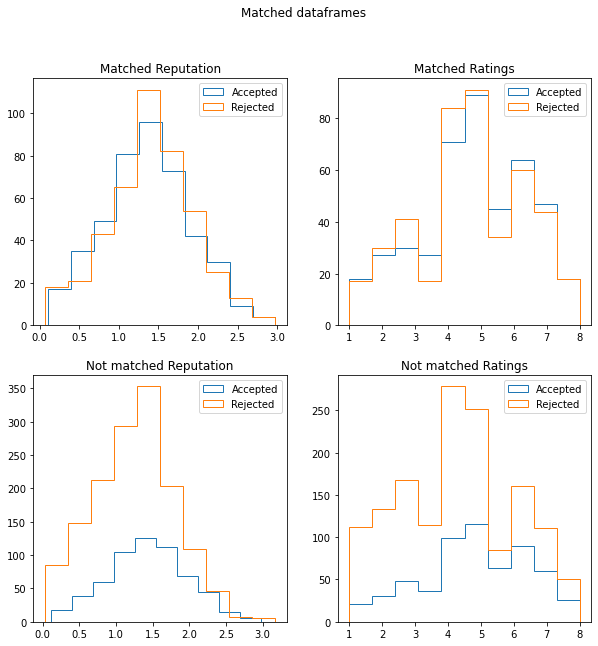

In [52]:
show_Mathed_comparison()

Matching did pretty much good job. It can be seen that Not matched histograms are very disbalanced for 'Rejected' articles

### Task 3.4

Finally, it's time to estimate the treatment effect. Given that we have pairs of matched samples, one that received treatment and one that did not, and that they have associated outcomes $y_{treat}$ and $y_{\neg treat}$. We can calculate the average treatment effect as:

$$
ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\neg treat}^{(i)}
$$

Notice that here the outcome is a simple binary variable which equals 1 if the paper has been accepted and equals 0 if the paper has been rejected, and $N$ is the total number of matched samples in our analysis.

According to your matched sample, estimate the treatment effect of publishing a paper on arxiv. Report the 95% CI through bootstrapping.


In [53]:
def bootstrap_CI_sum(data, nbr_draws):
    sums = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        sums[n] = np.sum(data_tmp)

    return [np.nanpercentile(sums, 5),np.nanpercentile(sums, 95)]

In [54]:
y_dif_normalized=((treated_matched.decisions=='Accept').astype(int)-
                  (non_treated_matched.decisions=='Accept').astype(int))/len(treated_matched)

low_CI,high_CI=bootstrap_CI_sum(y_dif_normalized,1000)

print('ATE={:.2f} +/- {:.2f}'.format(y_dif_normalized.sum(),(high_CI-low_CI)/2))

ATE=0.09 +/- 0.04


### Task 3.5

Wait, but what about prestigious institutions? 

1.  To understand what is going on there, repeat tasks 3.2 to 3.4 considering *only* the top 10 institutions. Notice that you can use the same propensity scores and re-do the steps in a reduced dataframe containing only top-institutions.
2. **Discuss:** Is this evidence that arxiv breaks double-blind submissions?

In [55]:
treated_matched,non_treated_matched,treated_df,non_treated_df=construct_mathed_dfs(
    df_2020[df_2020.has_top_institution==1])

/home/sdd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


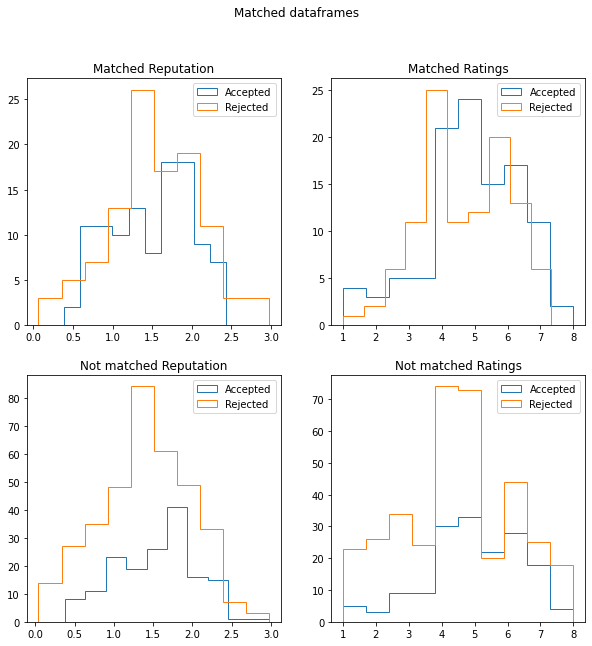

In [56]:
show_Mathed_comparison()

In [57]:
y_dif_normalized=((treated_matched.decisions=='Accept').astype(int)-
                  (non_treated_matched.decisions=='Accept').astype(int))/len(treated_matched)

low_CI,high_CI=bootstrap_CI_sum(y_dif_normalized,1000)

print('ATE for top insitutions is {:.2f} +/- {:.2f}'.format(y_dif_normalized.sum(),(high_CI-low_CI)/2))

ATE for top insitutions is 0.18 +/- 0.09
